# Welcome to GGR274

- What is Data Science?
- What is the role of Statistics in Data Science?

## Where is Data Science Used in Society?

### Questions

- Is there a Bike Share bike available?

- Will I experience another TTC delay today?

- Will this person commit a crime in the future?

- Does COVID-19 affect males more than females?

- What movies might this person enjoy?

- How many people attended Indian Day Schools in Canada?

## Bike Share Toronto

**Is there a bike available at St. George St. /Hoskin Ave.?**

<a href= 'https://bikesharetoronto.com'> <img src = 'bikesharescreenshot.png'> </a>



## Visualization using maps 

<mark> **Don't worry about understanding the code today - it's complicated, but we will be learning as the course goes on** </mark>

In [12]:
import folium

m = folium.Map(location=[43.664288100559816, -79.39800603825044], zoom_start =18)
m

## Bike Share data is ugly

But, it can be made beautiful with a little bit of programming ...

## Step 1

- Read the data from <https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information> into Python.

```
{"last_updated":1637611674,"ttl":30,"data":{"stations":[{"station_id":"7000","name":"Fort York  Blvd / Capreol Ct","physical_configuration":"REGULAR","lat":43.639832,"lon":-79.395954,"altitude":0.0,"address":"Fort York  Blvd / Capreol Ct","capacity":35,"rental_methods":["KEY","TRANSITCARD","CREDITCARD","PHONE"],"groups":[],"obcn":"647-643-9607","nearby_distance":500.0},{"station_id":"7001","name":"Wellesley Station Green P","physical_configuration":"REGULAR","lat":43.66496415990742,"lon":-79.38355031526893,"altitude":0.0,"address":"Yonge / Wellesley","post_code":"M4Y 1G7","capacity":17,"rental_methods":["KEY","TRANSITCARD","CREDITCARD","PHONE"],"groups":[],"obcn":"416-617-9576","nearby_distance":500.0},

```

&#128576; Don't worry about understanding all the details for now ... 

In [2]:
import pandas as pd

station_url = 'https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information'
stationinfo = pd.read_json(station_url)

stationlist = stationinfo['data'].iloc[0]

The first station data looks a bit better:

In [3]:
stationlist[0]

{'station_id': '7000',
 'name': 'Fort York  Blvd / Capreol Ct',
 'physical_configuration': 'REGULAR',
 'lat': 43.639832,
 'lon': -79.395954,
 'altitude': 0.0,
 'address': 'Fort York  Blvd / Capreol Ct',
 'capacity': 35,
 'is_charging_station': False,
 'rental_methods': ['KEY', 'TRANSITCARD', 'CREDITCARD', 'PHONE'],
 'groups': [],
 'obcn': '647-643-9607',
 'nearby_distance': 500.0,
 '_ride_code_support': True,
 'rental_uris': {}}

## Step 2

- A bit of programming is needed to **transform the data** into a format that can be displayed on the map above.

In [4]:
# convert JSON format to GeoJSON format 
def featuredict(lon,lat, id1, name, capacity):
    dict = {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates":  [lon,lat]
        },
        "properties": {
            "station_id": id1,
            "name": name,
            "capacity": capacity
        }
    }
    return(dict)


# featuredict1 = create_station_list
def create_station_list(l):
    m = []
    for x in range(0,len(l)):
        m.append(
            featuredict(
                l[x]['lon'],
                l[x]['lat'],
                l[x]['station_id'],
                l[x]['name'],
                l[x]['capacity']
            )
        )
        x += 1
    return(m)

stations = create_station_list(stationlist)
stations[0:2]

[{'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [-79.395954, 43.639832]},
  'properties': {'station_id': '7000',
   'name': 'Fort York  Blvd / Capreol Ct',
   'capacity': 35}},
 {'type': 'Feature',
  'geometry': {'type': 'Point',
   'coordinates': [-79.38355031526893, 43.66496415990742]},
  'properties': {'station_id': '7001',
   'name': 'Wellesley Station Green P',
   'capacity': 23}}]

## Step 2 (Cont'd)

- More data transformation ...

In [5]:
# convert stations list to GeoJSON format

def add_GeoJSON_formatting(features):
    dict = {
        "type": "FeatureCollection",
        "features": features
    }
    return(dict)


stations_geoj = add_GeoJSON_formatting(stations)
stations_geoj['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-79.395954, 43.639832]},
 'properties': {'station_id': '7000',
  'name': 'Fort York  Blvd / Capreol Ct',
  'capacity': 35}}

## A Data Science Application

**Question:** How many bikes are available

**Data:** TO Bike Share data

**Communicate the results:** Visualize the data on a map where the bikes are located

**Next Steps:** Predict how many bikes are available at hourly intervals

In [6]:
folium.GeoJson(
    stations_geoj, 
    name = "Bikes", 
    tooltip = folium.features.GeoJsonTooltip(fields=['station_id','name','capacity'], localize=True)
).add_to(m)
m

## TTC Subway Delays

<a href= 'https://open.toronto.ca/dataset/ttc-subway-delay-data/'> <img src = 'opendatatoronto-subway.png'> </a>

## Steps to Read the Public Data

1. Extract data file locations.

In [7]:
import requests
# Toronto Open Data is stored in a CKAN instance. It's APIs are documented here:
# https://docs.ckan.org/en/latest/api/

# To hit our API, you'll be making requests to:
base_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca"

# Datasets are called "packages". Each package can contain many "resources"
# To retrieve the metadata for this package and its resources, use the package name in this page's URL:
url = base_url + "/api/3/action/package_show"
params = { "id": "ttc-subway-delay-data"}
package = requests.get(url, params = params).json()
xlsx_list = []

# To get resource data:
for idx, resource in enumerate(package["result"]["resources"]):

       # To get metadata for non datastore_active resources:
       if not resource["datastore_active"]:
           url = base_url + "/api/3/action/resource_show?id=" + resource["id"]
           resource_metadata = requests.get(url).json()['result']
           # From here, you can use the "url" attribute to download this file
           print(resource_metadata['url'])
           xlsx_list.append(resource_metadata['url'])


https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/996cfe8d-fb35-40ce-b569-698d51fc683b/resource/3900e649-f31e-4b79-9f20-4731bbfd94f7/download/ttc-subway-delay-codes.xlsx
https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/996cfe8d-fb35-40ce-b569-698d51fc683b/resource/ca43ac3d-3940-4315-889b-a9375e7b8aa4/download/ttc-subway-delay-readme.xlsx
https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/996cfe8d-fb35-40ce-b569-698d51fc683b/resource/8ca4a6ed-5e7e-4b9d-b950-bf45e4b2fe20/download/ttc-subway-delay-jan-2014-april-2017.xlsx
https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/996cfe8d-fb35-40ce-b569-698d51fc683b/resource/e2ee9f63-3130-4d6a-a259-ce79c9c2f1bc/download/ttc-subway-delay-may-december-2017.xlsx
https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/996cfe8d-fb35-40ce-b569-698d51fc683b/resource/32bd0973-e83d-4df1-8219-c8c55cf34c6d/download/ttc-subway-delay-data-2018.xlsx
https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/996cfe8d-fb35-40ce-b569-698d51fc6

2. Read the files of interest, say files for 2022 and 2023.

In [8]:
import re
import pandas as pd
p = re.compile(".+(2022|2023)")
df_list = []

for x in xlsx_list:
    if p.match(x):
        print(x)
        df_list.append(pd.read_excel(x))

ttc_delays = pd.concat(df_list)
ttc_delays

https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/996cfe8d-fb35-40ce-b569-698d51fc683b/resource/441143ca-8194-44ce-a954-19f8141817c7/download/ttc-subway-delay-2022.xlsx
https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/996cfe8d-fb35-40ce-b569-698d51fc683b/resource/2fbec48b-33d9-4897-a572-96c9f002d66a/download/ttc-subway-delay-2023.xlsx


,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
1,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
3,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981
...,...,...,...,...,...,...,...,...,...,...
20877,2023-11-30,01:57,Thursday,SHEPPARD STATION,MUATC,5,10,N,YU,6066
20878,2023-11-30,01:58,Thursday,FINCH STATION,SUDP,0,0,NaN,YU,0
20879,2023-11-30,06:29,Thursday,BESSARION STATION,TUML,7,0,E,SHP,6186
20880,2023-11-30,07:39,Thursday,LESLIE STATION,PUOPO,9,16,W,SHP,6181


## What can we learn from the data?

Plotting (with a bit of manipulation) usually helps us see patterns that we might not see otherwise.

[Text(0.5, 0, 'Total Length of Delays (min)'), Text(0, 0.5, 'Top 15 Stations')]

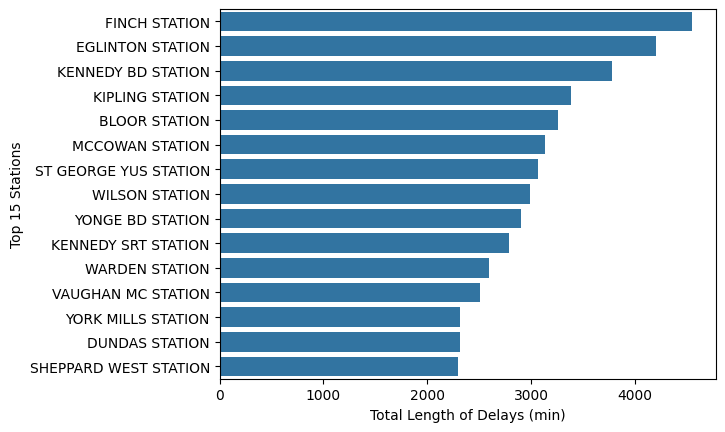

In [9]:
import seaborn as sns
ttc_delays_stn = ttc_delays.groupby(
    "Station" # station names need cleaning...
).agg(
    {"Min Delay": "sum"}
).reset_index().sort_values(
    "Min Delay", ascending = False
).head(15)
# print(ttc_delays_stn)
g = sns.barplot(
    data = ttc_delays_stn,
    x = "Min Delay",
    y = "Station"
)
g.set(xlabel = "Total Length of Delays (min)", ylabel = "Top 15 Stations")

[[<matplotlib.axis.XTick at 0x1545a7400>,
 [Text(1, 0, 'Jan'), Text(12, 0, 'Dec')],
 Text(0.5, 0, '')]

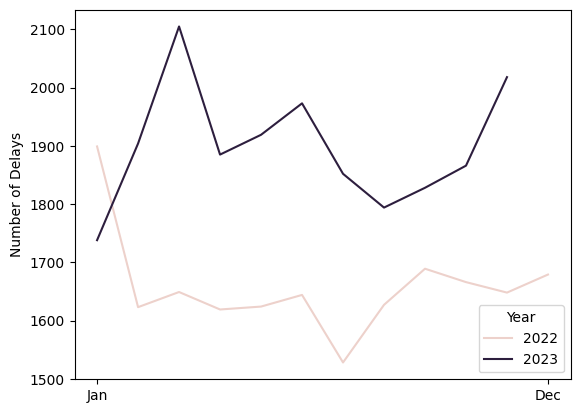

In [10]:
ttc_delays["Year"] = ttc_delays["Date"].apply(lambda x: x.year)
ttc_delays["Month"] = ttc_delays["Date"].apply(lambda x: x.month)
ttc_delays_ymd = ttc_delays.groupby(
    ["Year", "Month"]
).size().reset_index(name = "Number of Delays")

g = sns.lineplot(
    data = ttc_delays_ymd,
    x = "Month",
    y = "Number of Delays",
    hue = "Year"
)
g.set(xticks = [1, 12], xticklabels = ["Jan", "Dec"], xlabel = "")

## How many people attended Federal Day Schools?


In [11]:
from IPython.display import IFrame
IFrame("https://indiandayschools.org/", 1200,1000)

![](FederalDaySchools/cover_expertreport.png)

![](FederalDaySchools/title_expertreport.png)

![](FederalDaySchools/estimates_expertreport.png)

![](FederalDaySchools/datapg1_expertreport.png)

![](FederalDaySchools/datapg2_expertreport.png)

![](FederalDaySchools/datapg3_expertreport.png)


![](FederalDaySchools/c-8149-00418.png)

![](FederalDaySchools/c-8171-00008.png)

## Questions 

- What is the provenance of the data used in the expert report?

- How does this data relate to the original documents?

- What were record retention policies of Day Schools?

- If we don't know the data's provenance then it's not possible to assess the reliability of the total number of people that attended Day School from this data.